<a href="https://colab.research.google.com/github/Douglas-Wilian/Topicos-em-IA/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##IMPLEMENTAÇÃO DE ALGORITMOS DE ÁRVORE DE DECISÃO

Disciplina: Tópicos Especiais em Inteligência Artificial

Docente: José Alfredo

Discente: Douglas Wilian

In [1]:
#importacao da base de dados + bibliotecas

from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

Tendo carregado as bibliotecas, vamos carregar e configurar a base de dados wine

In [2]:
wine = load_wine()
df = pd.DataFrame(data = wine['data'], columns = wine['feature_names'])
df['target'] = wine['target']

df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Para a implementação da classificação, vamos separar os dados da coluna 'target', referente às classes de vinho.

In [3]:
indices = np.random.permutation(df.shape[0])
div = int(0.4*len(indices))
desen_id , test_id = indices[:div], indices[div:]

cj_desen, cj_test = df.loc[desen_id,:], df.loc[test_id,:]

xd = cj_desen.drop('target', axis =1)
yd = cj_desen.target

xt = cj_test.drop('target', axis=1)
yt = cj_test.target


display(xd.head())
display(yd.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
90,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.4,1.08,2.27,480.0
131,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.4,0.74,1.42,530.0
13,14.75,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.81,5.4,1.25,2.73,1150.0
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.4,1.06,2.31,750.0
111,12.52,2.43,2.17,21.0,88.0,2.55,2.27,0.26,1.22,2.0,0.90,2.78,325.0


90     1
131    2
13     0
78     1
111    1
Name: target, dtype: int64

Precisamos também separar os dados de treinamento e de testes.

In [4]:
display(xd.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
90,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.4,1.08,2.27,480.0
131,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.4,0.74,1.42,530.0
13,14.75,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.81,5.4,1.25,2.73,1150.0
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.4,1.06,2.31,750.0
111,12.52,2.43,2.17,21.0,88.0,2.55,2.27,0.26,1.22,2.0,0.90,2.78,325.0


90     1
131    2
13     0
78     1
111    1
Name: target, dtype: int64

In [9]:
display(yd.head())

90     1
131    2
13     0
78     1
111    1
Name: target, dtype: int64

In [5]:
display(xt.head())
display(yt.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
96,11.81,2.12,2.74,21.5,134.0,1.60,0.99,0.14,1.56,2.500000,0.95,2.26,625.0
36,13.28,1.64,2.84,15.5,110.0,2.60,2.68,0.34,1.36,4.600000,1.09,2.78,880.0
171,12.77,2.39,2.28,19.5,86.0,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470.0
23,12.85,1.60,2.52,17.8,95.0,2.48,2.37,0.26,1.46,3.930000,1.09,3.63,1015.0
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.940000,0.69,2.84,352.0


96     1
36     0
171    2
23     0
126    1
Name: target, dtype: int64

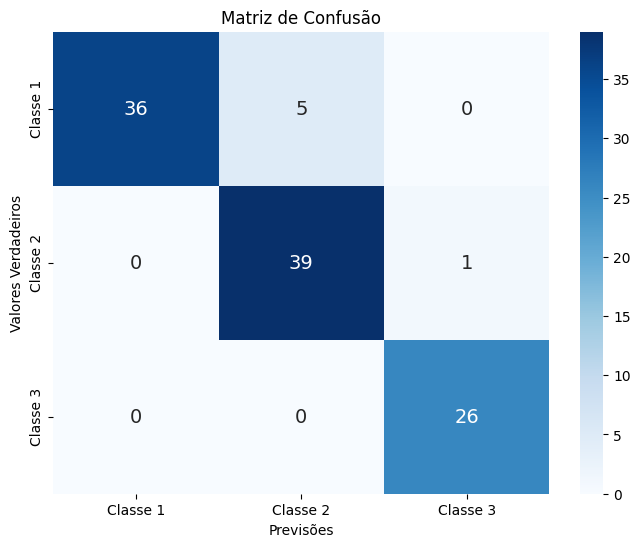

In [12]:
classi = tree.DecisionTreeClassifier(random_state=42)

classi = classi.fit(xd, yd)

prev = classi.predict(xt)

ac = accuracy_score(yt, prev)

cf = confusion_matrix(yt, prev)

plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.xlabel('Previsões')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')
plt.gca().set_xticklabels(["Classe 1", "Classe 2", "Classe 3"])
plt.gca().set_yticklabels(["Classe 1", "Classe 2", "Classe 3"])
plt.show()

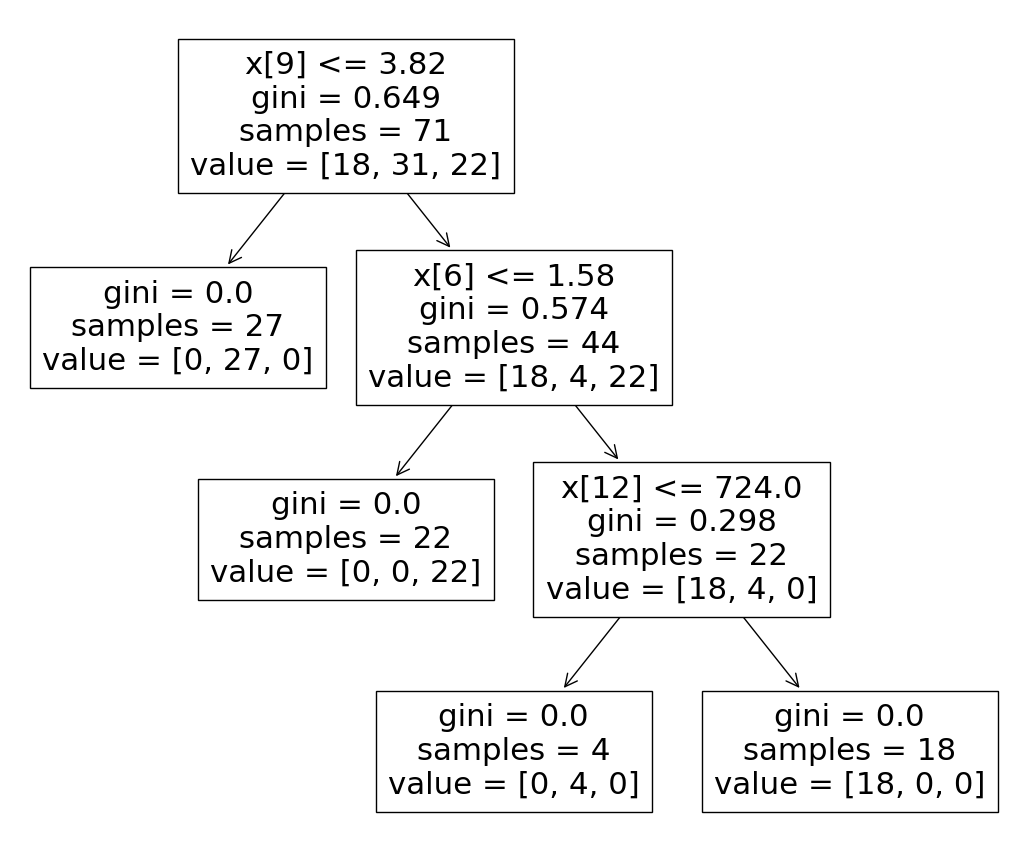

In [23]:
fig, ax = plt.subplots(figsize = (13,11))
tree.plot_tree(classi)
plt.show()

In [26]:
ac = ac*100
print(f"A acurária do processo foi {ac:.4f} %!")

A acurária do processo foi 94.3925 %!


###BANCO HEART DISEASE

In [31]:
from google.colab import drive
drive.mount('/content/drive')


caminho_arquivo = "/content/drive/My Drive/HD/heart.csv"

heart = pd.read_csv(caminho_arquivo)
heart.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [37]:
indices2 = np.random.permutation(heart.shape[0])
div2 = int(0.6*len(indices2))
desen_id2 , test_id2 = indices2[:div2], indices2[div2:]

cj_desen2, cj_test2 = heart.loc[desen_id2,:], heart.loc[test_id2,:]

xd2 = cj_desen2.drop('target', axis =1)
yd2 = cj_desen2.target

xt2 = cj_test2.drop('target', axis=1)
yt2 = cj_test2.target


display(xd2.head())
display(yd2.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
107,62,1,1,120,281,0,0,103,0,1.4,1,1,3
809,54,0,2,110,214,0,1,158,0,1.6,1,0,2
371,55,1,0,132,353,0,1,132,1,1.2,1,1,3
237,57,1,1,124,261,0,1,141,0,0.3,2,0,3
963,57,0,0,140,241,0,1,123,1,0.2,1,0,3


107    0
809    1
371    0
237    0
963    0
Name: target, dtype: int64

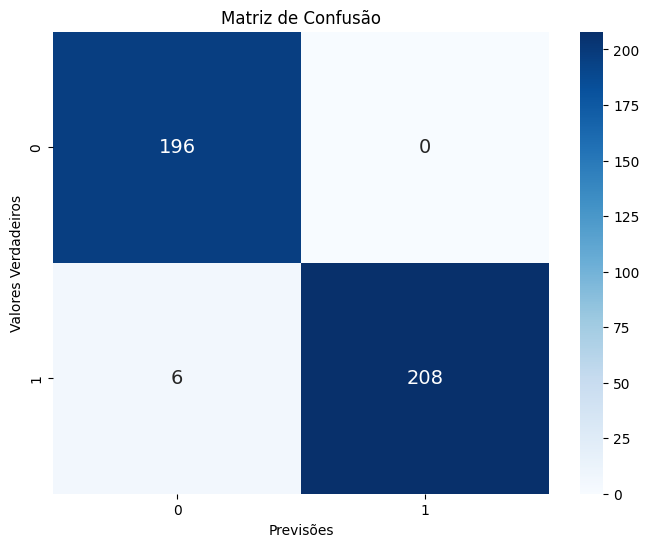

In [38]:
classi2 = tree.DecisionTreeClassifier(random_state=42)

classi2 = classi2.fit(xd2, yd2)

prev2 = classi2.predict(xt2)

ac2 = accuracy_score(yt2, prev2)

cf2 = confusion_matrix(yt2, prev2)

plt.figure(figsize=(8, 6))
sns.heatmap(cf2, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.xlabel('Previsões')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()

In [39]:
ac2 = ac2*100
print(f"A acurária do processo foi {ac2:.4f} %!")

A acurária do processo foi 98.5366 %!


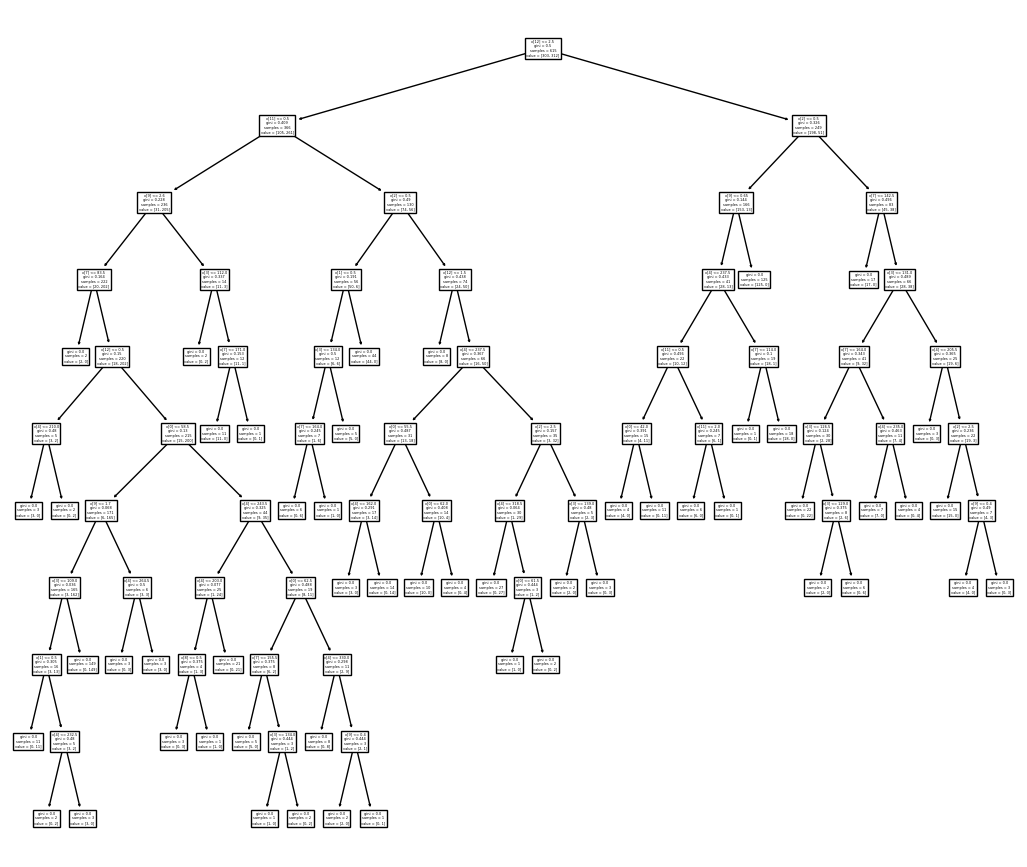

In [40]:
fig2, ax2 = plt.subplots(figsize = (13,11))
tree.plot_tree(classi2)
plt.show()